## Deep Learning for Melanoma Detection: A Convolutional Neural Network Approach

***

### Import Necessary Libraries

This code imports several libraries used for data processing and visualization, machine learning, and deep learning.

* numpy as np is a library for mathematical operations and is commonly used in scientific computing with Python.
* matplotlib.pyplot as plt is used for creating visualizations.
* seaborn is a visualization library built on top of matplotlib that provides a high-level interface for creating attractive and informative statistical graphics.
* tensorflow's keras module is a high-level API for building and training deep learning models.
* sklearn.utils's shuffle function is used for shuffling data randomly.
* skimage.transform's resize function is used for resizing images.
* sklearn.metrics contains a variety of metrics for evaluating the performance of machine learning models, including confusion_matrix, accuracy_score, and classification_report.
* glob is used for finding all the pathnames matching a specified pattern.
* time is used to measure how long a code takes to run.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.utils import shuffle
from skimage.transform import resize
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import glob
import time

## Reading the filenames of the images

This code uses the glob function to search for all the image files in two different directories (Melanoma & Non melanoma):

#### Training set

In [2]:
train_melanoma = glob.glob('train_sep/Melanoma/*.jpeg')
train_notmelanoma = glob.glob('train_sep/NotMelanoma/*.jpg')

#### Testing Set

In [3]:
test_melanoma = glob.glob('test/Melanoma/*.jpeg')
test_notmelanoma = glob.glob('test/NotMelanoma/*.jpg')

#### Validation Set

In [4]:
valid_melanoma = glob.glob('valid/Melanoma/*.jpeg')
valid_notmelanoma = glob.glob('valid/NotMelanoma/*.jpg')

### Check the number of images present in each folders

In [5]:
print(f"Number of images present in training set are: With Melanoma: {len(train_melanoma)}, No Melanoma: {len(train_notmelanoma)}")
print(f"Number of images present in testing set are: With Melanoma: {len(test_melanoma)}, No Melanoma: {len(test_notmelanoma)}")
print(f"Number of images present in validation set are: With Melanoma: {len(valid_melanoma)}, No Melanoma: {len(valid_notmelanoma)}")

Number of images present in training set are: With Melanoma: 2000, No Melanoma: 2000
Number of images present in testing set are: With Melanoma: 500, No Melanoma: 500
Number of images present in validation set are: With Melanoma: 200, No Melanoma: 200


## Reading the images as arrays and storing it in a list

This code is building a dataset for training a machine learning model.

The image and label lists are defined as empty lists, which will be populated with image data and corresponding labels, respectively.

For each image file path in the train_melanoma list:

The image file is read and stored in the img variable using the plt.imread function.
The img is appended to the image list.
The label 1 is appended to the label list, indicating that the image contains melanoma.
For each image file path in the train_notmelanoma list:

The image file is read and stored in the img variable using the plt.imread function.
The img is appended to the image list.
The label 0 is appended to the label list, indicating that the image does not contain melanoma.
After this loop, the image list will contain all the images, and the label list will contain the corresponding labels.

### Traning

In [6]:
image = []
label = []

for i in train_melanoma:
    img = plt.imread(i)
    image.append(img)
    label.append(1)
    
for i in train_notmelanoma:
    img = plt.imread(i)
    image.append(img)
    label.append(0)

### Testing

In [7]:
image_test = []
label_test = []

for i in test_melanoma:
    img = plt.imread(i)
    image_test.append(img)
    label_test.append(1)
    
for i in test_notmelanoma:
    img = plt.imread(i)
    image_test.append(img)
    label_test.append(0)

### Valid set

In [8]:
image_valid = []
label_valid = []

for i in valid_melanoma:
    img = plt.imread(i)
    image_valid.append(img)
    label_valid.append(1)
    
for i in valid_notmelanoma:
    img = plt.imread(i)
    image_valid.append(img)
    label_valid.append(0)

### Shuffling the data

This code shuffles the images and their corresponding labels in three different datasets: image, label, image_test, label_test, image_valid, and label_valid.

For each dataset, the shuffle function from the sklearn.utils library is used to shuffle the data randomly, using the random_state argument as seed for the random number generator. This ensures that the shuffling is done in a consistent and reproducible manner.

After shuffling, the image and label lists will contain the shuffled training data, the image_test and label_test lists will contain the shuffled testing data, and the image_valid and label_valid lists will contain the shuffled validation data.

In [9]:
image, label = shuffle(image, label, random_state = 1)
image_test, label_test = shuffle(image_test, label_test, random_state = 1)
image_valid, label_valid= shuffle(image_valid ,label_valid, random_state = 1)

### Plot some of the images

This code creates a figure with a grid of 12 subplots using the plt.figure and plt.subplot functions from the matplotlib.pyplot library. The figure size is set to (10, 10) using the figsize argument.

In the loop, the first 12 elements of the image list are displayed in the subplots. For each subplot:

The corresponding image is displayed using the plt.imshow function.
The label of the image is checked.
If the label is 0, the subplot title is set to Not Melanoma.
If the label is 1, the subplot title is set to Melanoma.
Finally, the plt.tight_layout function is called to adjust the subplots and the spacing between them, ensuring that

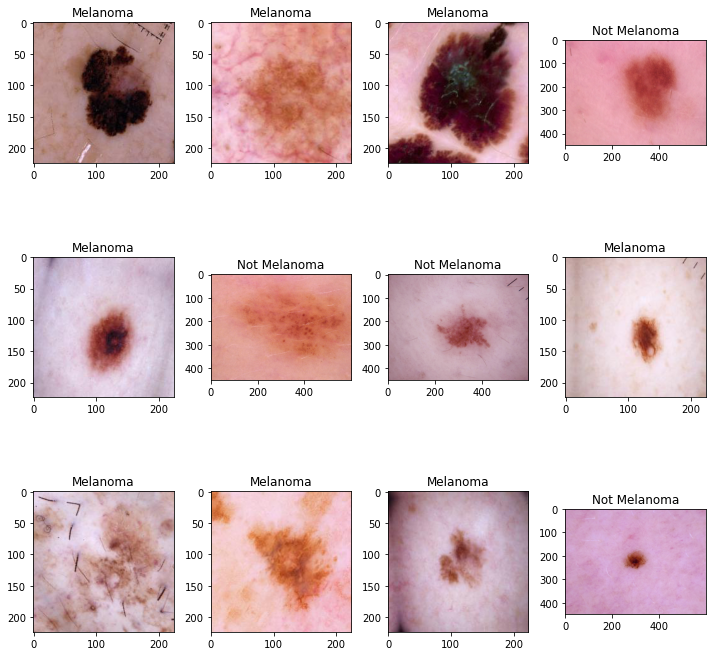

In [10]:
plt.figure(figsize = (10, 10))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(image[i])
    if label[i] == 0:
        plt.title('Not Melanoma')
    else:
        plt.title('Melanoma')
plt.tight_layout()

### Resizing the images

This code resizes the images in the image list and converts them into a numpy array for use in training a machine learning model.

First, an empty list X_train is defined.

In the loop, each image in the image list is passed through the resize function from the skimage.transform library. The function resizes the image to have a height and width of 224 pixels and 3 color channels (RGB). The resized image is then appended to the X_train list.

Finally, the X_train list is converted into a numpy array using the np.array function. The resulting numpy array X_train will contain the resized images and be in a format suitable for use in training a machine learning model.

In [11]:
X_train = []

for i in image:
    X_train.append(resize(i, (224, 224, 3)))
    
X_train = np.array(X_train)

In [12]:
X_test = []

for i in image_test:
    X_test.append(resize(i, (224, 224, 3)))
    
X_test = np.array(X_test)

In [13]:
X_valid = []

for i in image_valid:
    X_valid.append(resize(i, (224, 224, 3)))
    
X_valid = np.array(X_valid)

### Plot some of the images after resizing

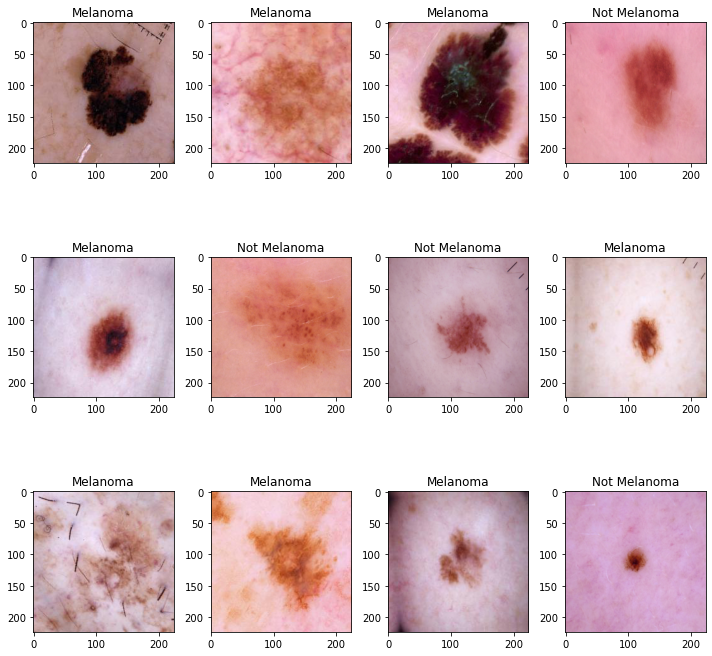

In [14]:
plt.figure(figsize = (10, 10))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(X_train[i])
    if label[i] == 0:
        plt.title('Not Melanoma')
    else:
        plt.title('Melanoma')
plt.tight_layout()

### Converting labels from list to numpy arrays

This code converts the labels for the training, testing, and validation datasets into numpy arrays.

The label list, containing the shuffled training labels, is converted into a numpy array y_train using the np.array function.

Similarly, the label_test list, containing the shuffled testing labels, is converted into a numpy array y_test using the np.array function.

And the label_valid list, containing the shuffled validation labels, is converted into a numpy array y_valid using the np.array function.

These numpy arrays y_train, y_test, and y_valid will be used as the target/label data in training, testing, and evaluating a machine learning model.

In [15]:
y_train = np.array(label)
y_test = np.array(label_test)
y_valid = np.array(label_valid)

### Keras Model

This code defines a convolutional neural network (CNN) using the keras library in TensorFlow.

The network is defined as a sequential model using the keras.models.Sequential function.

The model consists of a series of layers, each of which is added to the model using the model.add method.

The first layer is a 2D convolutional layer keras.layers.Conv2D with 16 filters, each with a size of 3x3, and a ReLU activation function. This layer is followed by a 2D max pooling layer keras.layers.MaxPool2D with a pool size of 2x2.

The next two layers are similar to the first two, with the exception that the number of filters has increased to 32.

The next layer is a flatten layer keras.layers.Flatten that takes the output from the final pooling layer and flattens it into a one-dimensional array, which is necessary for passing the data to the dense (fully connected) layer.

The final two layers are dense (fully connected) layers, keras.layers.Dense, with 64 neurons and a ReLU activation function, and a single output neuron with a sigmoid activation function, respectively. The sigmoid activation function will produce a binary output, which is suitable for a binary classification problem.

This model architecture can be used as a starting point for a melanoma classification problem, although it may need to be modified based on the specific dataset and requirements of the problem.

In [16]:
model = keras.models.Sequential([
    keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (224, 224, 3)),
    keras.layers.MaxPool2D(2,2),
    
    keras.layers.Conv2D(32,(3,3), activation = 'relu'),
    keras.layers.MaxPool2D(2,2),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

This code compiles the defined CNN model by specifying the optimizer, loss function, and evaluation metric used to train the model.

The optimizer used is the adam optimizer, which is a popular choice for training neural networks. The adam optimizer is a variant of gradient descent that adjusts the learning rate adaptively during training.

The loss function used is binary_crossentropy, which is a commonly used loss function for binary classification problems, such as the melanoma classification problem. The binary_crossentropy loss function measures the dissimilarity between the predicted output and the true output, with a lower value indicating a better fit.

The evaluation metric used during training and validation is accuracy, which is the proportion of correctly classified images. The accuracy metric is calculated as the ratio of correctly classified images to the total number of images.

In [17]:
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

### Train the model with the training set

This code trains the CNN model using the fit method. The training data is passed as the input arguments to the fit method, along with several training parameters.

The epochs parameter specifies the number of times the model should iterate over the entire training dataset. In this case, the model will iterate 150 times over the training data.

The batch_size parameter specifies the number of samples to be processed in a single forward and backward pass. In this case, the batch size is 20, meaning that 20 samples will be processed in each iteration.

The steps_per_epoch parameter specifies the number of steps (i.e. batches) to run before declaring one epoch complete. In this case, 30 steps will be run before one epoch is complete.

The validation_data parameter specifies the validation data that the model will use to evaluate its performance after each epoch. In this case, the validation data consists of the X_valid and y_valid arrays.

Finally, the time taken to train the model is recorded by measuring the difference between the start and end times, and is printed in minutes.

In [19]:
begin = time.time()

model.fit(X_train,y_train, epochs=150, batch_size = 20, steps_per_epoch=30, validation_data=(X_valid, y_valid))

time.sleep(1)
end = time.time()

print(f"Total Time taken to train the model: {(end - begin)/60} minutes")

Epoch 1/150
30/30 [==============================] - 15s 492ms/step - loss: 1.3112 - accuracy: 0.5867 - val_loss: 0.5596 - val_accuracy: 0.7200
Epoch 2/150
30/30 [==============================] - 14s 478ms/step - loss: 0.5755 - accuracy: 0.6817 - val_loss: 0.5952 - val_accuracy: 0.6650
Epoch 3/150
30/30 [==============================] - 14s 476ms/step - loss: 0.5504 - accuracy: 0.7167 - val_loss: 0.5472 - val_accuracy: 0.7125
Epoch 4/150
30/30 [==============================] - 14s 477ms/step - loss: 0.5222 - accuracy: 0.7117 - val_loss: 0.5209 - val_accuracy: 0.7325
Epoch 5/150
30/30 [==============================] - 14s 478ms/step - loss: 0.5119 - accuracy: 0.7467 - val_loss: 0.5049 - val_accuracy: 0.7375
Epoch 6/150
30/30 [==============================] - 14s 483ms/step - loss: 0.5034 - accuracy: 0.7400 - val_loss: 0.5285 - val_accuracy: 0.7475
Epoch 7/150
30/30 [==============================] - 14s 482ms/step - loss: 0.5243 - accuracy: 0.7017 - val_loss: 0.5797 - val_accuracy:

30/30 [==============================] - 14s 472ms/step - loss: 0.0445 - accuracy: 0.9800 - val_loss: 0.4132 - val_accuracy: 0.8750
Epoch 114/150
30/30 [==============================] - 14s 453ms/step - loss: 0.0293 - accuracy: 0.9933 - val_loss: 0.3685 - val_accuracy: 0.9025
Epoch 115/150
30/30 [==============================] - 14s 470ms/step - loss: 0.0305 - accuracy: 0.9883 - val_loss: 0.3608 - val_accuracy: 0.8900
Epoch 116/150
30/30 [==============================] - 15s 493ms/step - loss: 0.0448 - accuracy: 0.9883 - val_loss: 0.4238 - val_accuracy: 0.8725
Epoch 117/150
30/30 [==============================] - 14s 460ms/step - loss: 0.0667 - accuracy: 0.9767 - val_loss: 0.4287 - val_accuracy: 0.8625
Epoch 118/150
30/30 [==============================] - 15s 505ms/step - loss: 0.0691 - accuracy: 0.9767 - val_loss: 0.3755 - val_accuracy: 0.8775
Epoch 119/150
30/30 [==============================] - 14s 453ms/step - loss: 0.0534 - accuracy: 0.9850 - val_loss: 0.3472 - val_accuracy:

This code evaluates the performance of the trained model on the training data. It uses the model.evaluate method which takes two arguments, the first one is the input data which is the training data in this case X_train, and the second one is the target variable which is the corresponding target variable to the input data, y_train. The method returns the loss and accuracy values for the input data.

In [20]:
model.evaluate(X_train, y_train)

125/125 [==============================] - 17s 136ms/step - loss: 0.0017 - accuracy: 1.0000


[0.0017435263143852353, 1.0]

This code makes predictions using the trained model. The model.predict method is used here, which takes a single argument which is the input data that needs to be used for making predictions. The input data in this case is the testing data X_test. The method returns the predicted probabilities for each image in the testing data, with values ranging from 0 to 1, where 1 represents complete confidence that the image is of class 1 (in this case melanoma) and 0 represents complete confidence that the image is of class 0 (in this case not melanoma).

In [21]:
prediction = model.predict(X_test)

This code is converting the predicted probabilities obtained from the model's prediction into binary class labels. For this, it loops through the predicted probabilities prediction and checks if the probability is greater than 0.5. If the probability is greater than 0.5, the image is considered to belong to class 1 (in this case melanoma) and if the probability is less than or equal to 0.5, the image is considered to belong to class 0 (in this case not melanoma). The resulting binary class labels are appended to the list pred.

In [23]:
pred = []

for i in prediction:
    if i > 0.5:
        pred.append(1)
    else:
        pred.append(0)

This code is creating a plot of 12 images from the test set with their respective predictions. The pred list is created by looping through the model predictions (stored in prediction) and if the prediction value is greater than 0.5, it is considered as Melanoma and is appended to pred as 1. Otherwise, it is considered as Not Melanoma and is appended as 0. Then, a figure is created with a size of (20, 20) and 12 subplots are created with 3 rows and 4 columns. Each subplot displays an image from the test set and its prediction, either "Melanoma Detected" or "Not Detected", is displayed as its title.

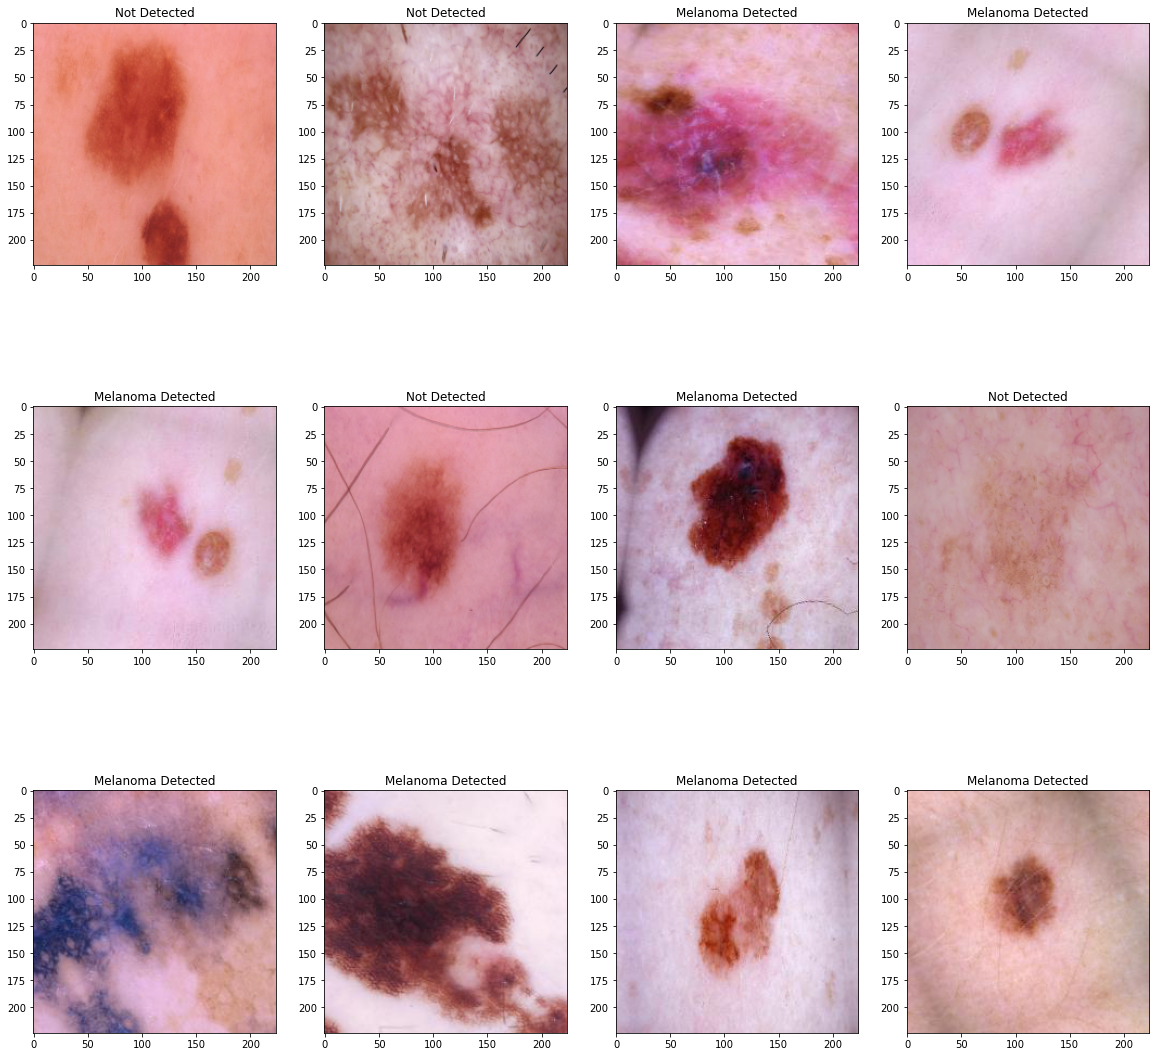

In [24]:
plt.figure(figsize = (20,20))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(X_test[i])
    if pred[i] == 1:
        plt.title('Melanoma Detected')
    else:
        plt.title('Not Detected')

### Evaluate the model

This code calculates the accuracy of the model's predictions using the accuracy_score function from scikit-learn. The function takes the true labels (y_test) and the predicted labels (pred) as inputs and returns the accuracy score as a float between 0 and 1, indicating the percentage of correct predictions.

In [25]:
accuracy_score(y_test,pred)

0.903

This code generates a heatmap of the confusion matrix to visualize the number of correct and incorrect predictions made by the model on the test data. The confusion matrix is calculated using the confusion_matrix function from the sklearn.metrics library and the parameters are y_test (true labels of the test data) and pred (predicted labels from the model). The heatmap is created using the heatmap function from the seaborn library. The annot argument is set to True to show the count of correct/incorrect predictions in each cell and fmt is set to 'd' to display the values as integers. The plt.show() function is used to display the heatmap.

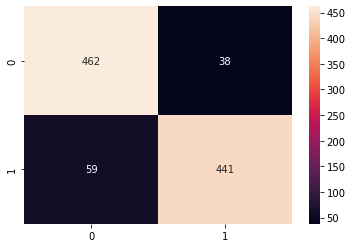

In [27]:
sns.heatmap(confusion_matrix(y_test,pred), annot = True, fmt= 'd')
plt.show()

This code generates a classification report that provides a summary of the performance of the model in making predictions on the test data. The report includes metrics such as precision, recall, f1-score, and support, which provide information about the accuracy of the model and its ability to correctly identify true positive and negative instances. The report helps in evaluating the performance of the model and determining if any adjustments need to be made to improve its accuracy.

In [26]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       500
           1       0.92      0.88      0.90       500

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.90      0.90      0.90      1000



***